In [2]:
from utils import pipeline, plot_learning_curve, plot_confusion_matrix

In [39]:
CONFIG = dict(
    model="LSTM",                     # 4 options: "RNN", "LSTM", "GRU", "BiLSTM-CRF"
    dataset="ATE",                   # 2 options: "NER", "ATE"
    embedding="FastText",            # 3 options: "Word2Vec", "GloVe", "FastText"       => 4*3*2 = 24 models
    batch_size=128,
    epochs=30,
    lr=1e-2,
    criterion="NLLLoss",
    optimizer="Adagrad",
    hyperparams=dict(
        input_size=300,
        hidden_size=128,
        num_layers=2
    ),
    early_stopping_patience=1,
    device="cpu",
    verbose=True,
    CRF=False
)

In [40]:
# KEYS: "model", "encoder", "train_loader", "test_loader", "val_loader", "accuracy", "precision", "recall", "f1", "cf", and "loss"
run = pipeline(CONFIG)

CRF: False
Loading Word Embeddings...
Preprocessing Data...
NLLLoss()


 37%|█████▌         | 11/30 [00:25<00:43,  2.28s/it, [Train: Loss: 0.04502, F1-Score: 0.74135], [Validation: Loss: 0.04498, F1-Score: 0.74515]]



Early Stopping at Epoch 11.
Test Loss: 0.05466
Accuracy: 0.90259, Precision: 0.72496, Recall: 0.74807, F1-Score: 0.73608


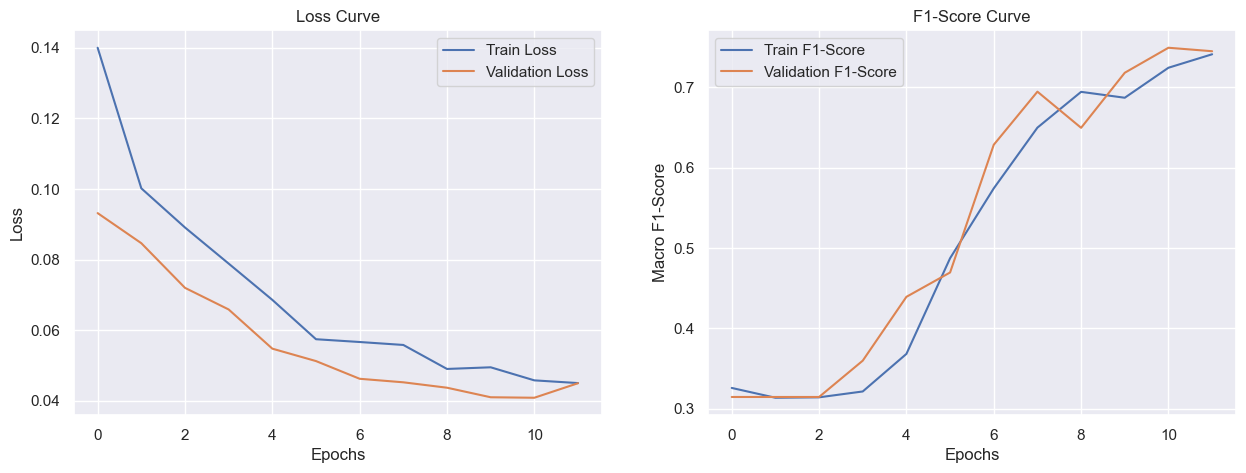

In [41]:
plot_learning_curve(run["model"])

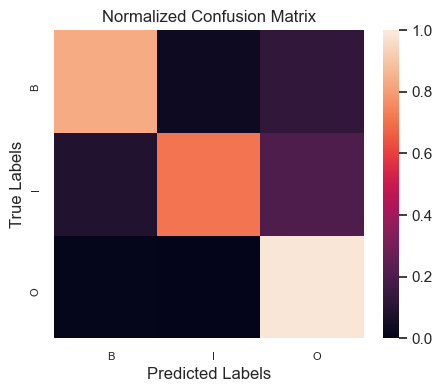

In [5]:
plot_size = (7, 6) if CONFIG["dataset"] == "NER" else (5, 4)
plot_confusion_matrix(run["cf"], labels=run["encoder"].classes_, size=plot_size)